# Yuyu Fan & Yining Shen 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
class TISP:
    
    def __init__(self, file_xTr, file_yTr, file_xVal, file_yVal, case, maxIt=100):
        self.xTr=file_xTr
        self.yTr=file_yTr
        self.xVal=file_xVal
        self.yVal=file_yVal

        print('finish loading data')
        self.preProcess()
        self.w=np.zeros(self.xTr.shape[1])

        # lam: lambda
        # eta: learning rate
        # maxIt: max iterations 
        self.lam=0.0001
        self.eta=1./self.xTr.shape[0]
        self.maxIt=maxIt
        self.case=case

    def preProcess(self):
        xStd=np.std(self.xTr, axis=0)
        mask=(xStd!=0.)
        self.xTr=self.xTr[:, mask]
        meanX=np.mean(self.xTr, axis=0)
        stdX=np.std(self.xTr, axis=0)
        self.xTr=(self.xTr-meanX)/stdX
        self.xVal=self.xVal[:, mask]
        self.xVal=(self.xVal-meanX)/stdX

        self.xTr=np.insert(self.xTr, 0, 1., axis=1)
        self.xVal=np.insert(self.xVal, 0, 1., axis=1)

        self.yTr[self.yTr==0.]=-1.
        self.yVal[self.yVal==0.]=-1.
        print('finish preprocessing data')

    def gradient(self):
        wx=np.sum(self.xTr*self.w, axis=1)
        temp=self.yTr/(1.+np.exp(self.yTr*wx))
        grad=np.sum(temp*(self.xTr).T, axis=1)
        return grad

    def update(self):
        grad=self.gradient()
        self.w+=grad*self.eta
        self.w[np.absolute(self.w)<=self.lam]=0.

    def train(self):
        if self.case==1:
            #gisette
            lams=[0.187, 0.134, 0.0875, 0.0529, 0.03858]
        elif self.case==2:
            # dexter
            lams=[0.141, 0.098, 0.0712, 0.0523, 0.0466]
        elif self.case==3:
            # madelon
            lams=[0.029795977, 0.0245, 0.01775, 0.0075, 0.00009]
        misclassTr=np.zeros(len(lams))
        misclassVal=np.zeros(len(lams))
        features=np.zeros(len(lams))
        for j in range(len(lams)):
            self.lam=lams[j]

            for i in range(self.maxIt):
                self.update()
                print(i, 'numbers of non zero weights: ', np.sum(self.w!=0.))
                    
            wx=np.sum(self.xTr*self.w, axis=1)
            pred=np.ones(self.yTr.shape[0])
            pred[wx<0.]=-1.
            misclassTr[j]=1.-np.mean(pred==self.yTr)
            features[j]=np.sum(self.w!=0.)

            wx=np.sum(self.xVal*self.w, axis=1)
            pred=np.ones(self.yVal.shape[0])
            pred[wx<0.]=-1.
            misclassVal[j]=1.-np.mean(pred==self.yVal)
            print('lam: ', self.lam,', miss classification err in train, val: ',
                   misclassTr[j], misclassVal[j])
            self.w=np.zeros_like(self.w)
        return misclassTr, misclassVal, lams, features 

In [4]:
def plotGraph(misclassTr, misclassVal, features):
    figureIndex=0
    plt.figure(figureIndex)
    figureIndex += 1
    plt.plot(features, misclassTr, 'o-', label='train')
    plt.plot(features, misclassVal, 's-', label='test')
    plt.xlabel('num of features')
    plt.ylabel('miss classification ratio')

    plt.legend()
    plt.show() 

In [5]:
def dataFormatTrans(file):     
    sample = np.zeros((300, 20000))
    f = open(file) 
    count = 0
    for d in f:
        d = d.strip('\n')
        data = d.strip().split(' ')
        temp = [i.split(':') for i in data]
        for j in range(len(temp)):
            sample[count][int(temp[j][0])] = temp[j][1]
        count += 1
    f.close()
    return sample

finish loading data
finish preprocessing data
0 numbers of non zero weights:  89
1 numbers of non zero weights:  48
2 numbers of non zero weights:  18
3 numbers of non zero weights:  18
4 numbers of non zero weights:  18
5 numbers of non zero weights:  17
6 numbers of non zero weights:  17
7 numbers of non zero weights:  17
8 numbers of non zero weights:  17
9 numbers of non zero weights:  17
10 numbers of non zero weights:  17
11 numbers of non zero weights:  17
12 numbers of non zero weights:  17
13 numbers of non zero weights:  15
14 numbers of non zero weights:  15
15 numbers of non zero weights:  14
16 numbers of non zero weights:  14
17 numbers of non zero weights:  14
18 numbers of non zero weights:  14
19 numbers of non zero weights:  14
20 numbers of non zero weights:  14
21 numbers of non zero weights:  14
22 numbers of non zero weights:  14
23 numbers of non zero weights:  14
24 numbers of non zero weights:  14
25 numbers of non zero weights:  14
26 numbers of non zero weigh

22 numbers of non zero weights:  124
23 numbers of non zero weights:  124
24 numbers of non zero weights:  123
25 numbers of non zero weights:  123
26 numbers of non zero weights:  122
27 numbers of non zero weights:  120
28 numbers of non zero weights:  120
29 numbers of non zero weights:  120
30 numbers of non zero weights:  120
31 numbers of non zero weights:  119
32 numbers of non zero weights:  118
33 numbers of non zero weights:  118
34 numbers of non zero weights:  118
35 numbers of non zero weights:  117
36 numbers of non zero weights:  117
37 numbers of non zero weights:  117
38 numbers of non zero weights:  117
39 numbers of non zero weights:  115
40 numbers of non zero weights:  114
41 numbers of non zero weights:  114
42 numbers of non zero weights:  114
43 numbers of non zero weights:  114
44 numbers of non zero weights:  114
45 numbers of non zero weights:  114
46 numbers of non zero weights:  114
47 numbers of non zero weights:  113
48 numbers of non zero weights:  113
4

39 numbers of non zero weights:  604
40 numbers of non zero weights:  603
41 numbers of non zero weights:  598
42 numbers of non zero weights:  598
43 numbers of non zero weights:  594
44 numbers of non zero weights:  590
45 numbers of non zero weights:  589
46 numbers of non zero weights:  583
47 numbers of non zero weights:  580
48 numbers of non zero weights:  574
49 numbers of non zero weights:  573
50 numbers of non zero weights:  572
51 numbers of non zero weights:  569
52 numbers of non zero weights:  565
53 numbers of non zero weights:  564
54 numbers of non zero weights:  563
55 numbers of non zero weights:  560
56 numbers of non zero weights:  558
57 numbers of non zero weights:  557
58 numbers of non zero weights:  556
59 numbers of non zero weights:  556
60 numbers of non zero weights:  550
61 numbers of non zero weights:  546
62 numbers of non zero weights:  543
63 numbers of non zero weights:  541
64 numbers of non zero weights:  541
65 numbers of non zero weights:  537
6

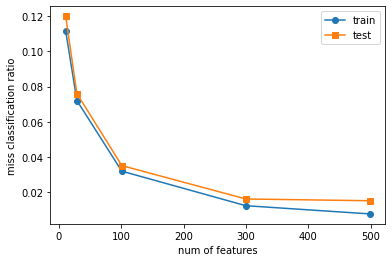

,0,1,2,3,4
0,0.111667,0.072,0.031833,0.012167,0.0075
1,0.120000,0.076,0.035000,0.016000,0.0150
2,11.000000,29.000,101.000000,300.000000,499.0000


In [10]:
## Problem A ##
xTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/Gisette/gisette_train.data")
yTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/Gisette/gisette_train.labels")
xVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/Gisette/gisette_valid.data")
yVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/Gisette/gisette_valid.labels")
lr=TISP(xTr, yTr, xVal, yVal, case=1)
misclassTr, misclassVal, lam, features=lr.train()

plotGraph(misclassTr, misclassVal, features)
pd.DataFrame([misclassTr, misclassVal, features])

In [7]:
pd.DataFrame([misclassTr, misclassVal, maxIt])

NameError: name 'maxIt' is not defined

In [ ]:
plt.plot(range(1,100,1), avg_train_r2, label = 'Training misclassification error' )
plt.plot(range(1,100,1), avg_test_r2, label = 'Test misclassification error' )
plt.grid()
plt.xlabel('Tree Depth')
plt.ylabel('Average R_squared')
plt.legend()

finish loading data
finish preprocessing data
lam:  0.029795977 , miss classification err in train, val:  0.0 0.09999999999999998
lam:  0.0245 , miss classification err in train, val:  0.0 0.15333333333333332
lam:  0.01775 , miss classification err in train, val:  0.0 0.15333333333333332
lam:  0.0075 , miss classification err in train, val:  0.0 0.16000000000000003
lam:  9e-05 , miss classification err in train, val:  0.0 0.16000000000000003


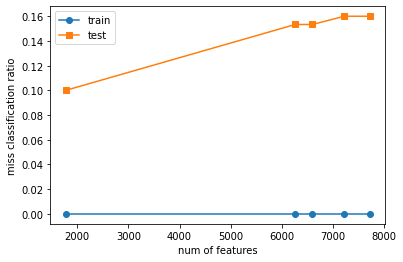

,0,1,2,3,4
0,0.0,0.000000,0.000000,0.00,0.00
1,0.1,0.153333,0.153333,0.16,0.16
2,1774.0,6262.000000,6598.000000,7223.00,7724.00


In [6]:
## Problem B ##
xTr=dataFormatTrans(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/dexter/dexter_train.data")
yTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/dexter/dexter_train.labels")
xVal=dataFormatTrans(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/dexter/dexter_valid.data")
yVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/dexter/dexter_valid.labels")    
lr=TISP(xTr, yTr, xVal, yVal, case=3)
misclassTr, misclassVal, lam, features=lr.train()

plotGraph(misclassTr, misclassVal, features)
pd.DataFrame([misclassTr, misclassVal, features])

finish loading data
finish preprocessing data
lam:  0.029795977 , miss classification err in train, val:  0.386 0.395
lam:  0.0245 , miss classification err in train, val:  0.365 0.42833333333333334
lam:  0.01775 , miss classification err in train, val:  0.32899999999999996 0.42166666666666663
lam:  0.0075 , miss classification err in train, val:  0.26949999999999996 0.42833333333333334
lam:  9e-05 , miss classification err in train, val:  0.26049999999999995 0.42666666666666664


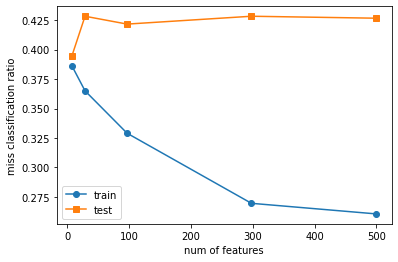

,0,1,2,3,4
0,0.386,0.365000,0.329000,0.269500,0.260500
1,0.395,0.428333,0.421667,0.428333,0.426667
2,8.000,29.000000,97.000000,298.000000,500.000000


In [7]:
## Problem C ##

xTr = np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\Data\MADELON\madelon_train.data")
yTr = np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\Data\MADELON\madelon_train.labels")
xVal = np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\Data\MADELON\madelon_valid.data")
yVal = np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\Data\MADELON\madelon_valid.labels")
lr=TISP(xTr, yTr, xVal, yVal, case=3)
misclassTr, misclassVal, lam, features=lr.train()

plotGraph(misclassTr, misclassVal, features)
pd.DataFrame([misclassTr, misclassVal, features])